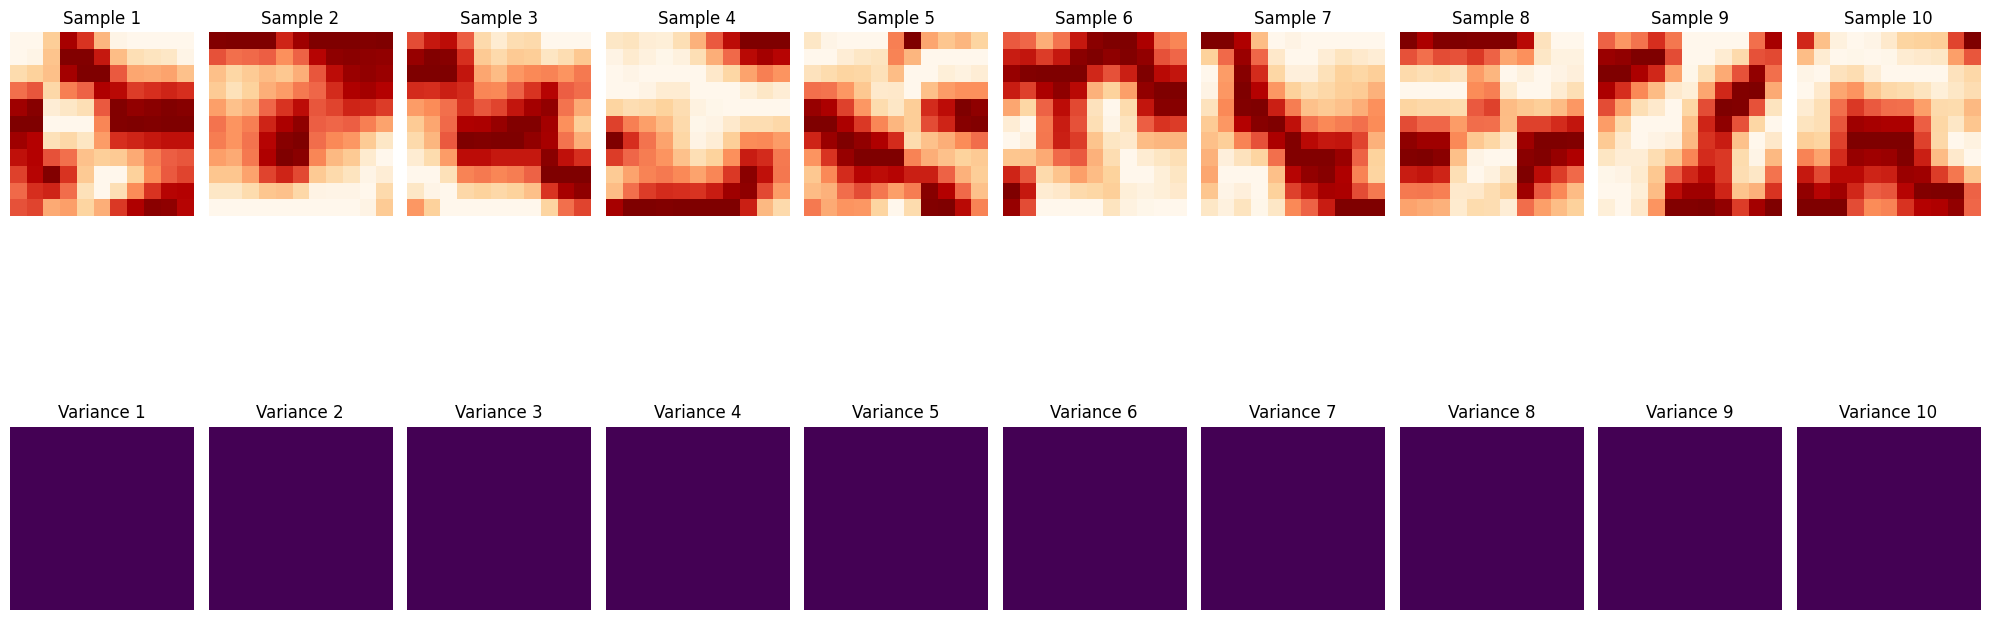

In [9]:
import GPy as GPy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# Setup plot
f, ax = plt.subplots(2, 10, figsize=(20, 10))  # Two rows, ten columns

grids = []
variances_list = []  # List to store variances for each grid

xmin = 0
xmax = 10

for i in range(30):
    # Gaussian Process Kernel Setup
    k = GPy.kern.RBF(input_dim=2, variance=1, lengthscale=2)

    # Creating a grid of points
    xx, yy = np.mgrid[xmin:xmax+1, xmin:xmax+1]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)  # Compute covariance matrix of X

    # Extract variances and store them
    variances = np.diag(K)
    variances_list.append(variances.reshape(*xx.shape))

    # GP prior distribution and reshape to grid
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    grid = s.reshape(*xx.shape)
    grid = (minmax_scale(grid) * 100).astype(int)
    grids.append(grid)

    # Plotting grids and variances
    if i < 10:
        ax[0, i].imshow(grid, interpolation='none', cmap=plt.get_cmap('OrRd'))
        ax[0, i].set_title('Sample ' + str(i+1))
        ax[0, i].axis('off')  # Turn off axis for clarity

        ax[1, i].imshow(variances_list[i], interpolation='none', cmap=plt.get_cmap('viridis'))
        ax[1, i].set_title('Variance ' + str(i+1))
        ax[1, i].axis('off')  # Turn off axis for clarity

plt.tight_layout()
plt.show()
